In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Aryan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aryan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aryan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Aryan
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
para="Sports build teamwork, boost fitness, and inspire passion. They unite communities, teach discipline, and provide thrilling moments of unforgettable excitement."
para=re.sub(r'[^\w\s]', '', para.lower())
word_tokens=word_tokenize(para)
print(f"word tokens are: {word_tokens}")
print()
sent_tokens=sent_tokenize(para)
split_tokens=para.split()
print(f"split tokens are: {split_tokens}")
print()
print(f"difference between the two is: {set(word_tokens)-set(split_tokens)}")
print()
stop_words=set(stopwords.words('english'))
filtered_words=[w for w in word_tokens if w not in stop_words]
word_freq=FreqDist(filtered_words)
print(f"frequency distribution excluding stopwords is: {word_freq.most_common()}")

word tokens are: ['sports', 'build', 'teamwork', 'boost', 'fitness', 'and', 'inspire', 'passion', 'they', 'unite', 'communities', 'teach', 'discipline', 'and', 'provide', 'thrilling', 'moments', 'of', 'unforgettable', 'excitement']

split tokens are: ['sports', 'build', 'teamwork', 'boost', 'fitness', 'and', 'inspire', 'passion', 'they', 'unite', 'communities', 'teach', 'discipline', 'and', 'provide', 'thrilling', 'moments', 'of', 'unforgettable', 'excitement']

difference between the two is: set()

frequency distribution excluding stopwords is: [('sports', 1), ('build', 1), ('teamwork', 1), ('boost', 1), ('fitness', 1), ('inspire', 1), ('passion', 1), ('unite', 1), ('communities', 1), ('teach', 1), ('discipline', 1), ('provide', 1), ('thrilling', 1), ('moments', 1), ('unforgettable', 1), ('excitement', 1)]


In [15]:
a=re.findall(r'\b[A-Za-z]+\b',para)
print(f"words with only alphabets are: {a}")
print()
filtered_words=[w for w in a if w not in stop_words]
print(filtered_words)
print()
ps=PorterStemmer()
lm=WordNetLemmatizer()
d1=[]
for w in filtered_words:
    d1.append(ps.stem(w))
print(f"using porter stemmer: {d1}")
d2=[]
for w in filtered_words:
    d2.append(lm.lemmatize(w))
print()
print(f"using word net lemmatizer: {d2}")

words with only alphabets are: ['sports', 'build', 'teamwork', 'boost', 'fitness', 'and', 'inspire', 'passion', 'they', 'unite', 'communities', 'teach', 'discipline', 'and', 'provide', 'thrilling', 'moments', 'of', 'unforgettable', 'excitement']

['sports', 'build', 'teamwork', 'boost', 'fitness', 'inspire', 'passion', 'unite', 'communities', 'teach', 'discipline', 'provide', 'thrilling', 'moments', 'unforgettable', 'excitement']

using porter stemmer: ['sport', 'build', 'teamwork', 'boost', 'fit', 'inspir', 'passion', 'unit', 'commun', 'teach', 'disciplin', 'provid', 'thrill', 'moment', 'unforgett', 'excit']

using word net lemmatizer: ['sport', 'build', 'teamwork', 'boost', 'fitness', 'inspire', 'passion', 'unite', 'community', 'teach', 'discipline', 'provide', 'thrilling', 'moment', 'unforgettable', 'excitement']


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
text=["Major Storm Disrupts Travel Across Northeast as Snowfall Hits Hard.","This coffee maker is a game-changer—quick, quiet, and brews the perfect cup every time!","Can’t believe I just finished my first 10K run! Feeling proud and exhausted"]
cv=CountVectorizer()
x=cv.fit_transform(text)
print(cv.get_feature_names_out())
print(x.toarray())
print()
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(text)
b=tfidf.get_feature_names_out()
print(b)
print(tfidf_matrix.toarray())
print()
for i, a in enumerate(text):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    sorted_indices = tfidf_scores.argsort()[::-1]
    top_keywords = [b[j] for j in sorted_indices[:3]]
    print(f"Text {i + 1}: {a}")
    print(f"Top 3 keywords: {top_keywords}\n")

['10k' 'across' 'and' 'as' 'believe' 'brews' 'can' 'changer' 'coffee'
 'cup' 'disrupts' 'every' 'exhausted' 'feeling' 'finished' 'first' 'game'
 'hard' 'hits' 'is' 'just' 'major' 'maker' 'my' 'northeast' 'perfect'
 'proud' 'quick' 'quiet' 'run' 'snowfall' 'storm' 'the' 'this' 'time'
 'travel']
[[0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1]
 [0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0]]

['10k' 'across' 'and' 'as' 'believe' 'brews' 'can' 'changer' 'coffee'
 'cup' 'disrupts' 'every' 'exhausted' 'feeling' 'finished' 'first' 'game'
 'hard' 'hits' 'is' 'just' 'major' 'maker' 'my' 'northeast' 'perfect'
 'proud' 'quick' 'quiet' 'run' 'snowfall' 'storm' 'the' 'this' 'time'
 'travel']
[[0.         0.31622777 0.         0.31622777 0.         0.
  0.         0.         0.         0.         0.31622777 0.
  0.         0.         0.         0.         0.         0.3162

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
a="Artificial Intelligence enables machines to simulate human intelligence. It powers applications like voice assistants, recommendation systems, and autonomous vehicles. AI learns from data, improving its performance over time through techniques like machine learning. It's widely used in healthcare, finance, and customer service to enhance decision-making and efficiency."
b="Blockchain is a decentralized digital ledger that securely records transactions across a network. Each block contains a list of transactions and links to the previous block, ensuring transparency and immutability. It's commonly used in cryptocurrencies like Bitcoin, but its potential extends to supply chain management, voting systems, and digital identity verification."
a1=re.sub(r'[^\w\s]','',a.lower())
print(a1)
print()
a2=re.sub(r'[^\w\s]','',b.lower())
print(a2)
print()
text1=set(a1.split())
text2=set(a2.split())
print(text1)
print()
print(text2)
print()
jaccard=len(text1 & text2)/len(text1 | text2)
print(f"jaccard similarity: {jaccard}")
print()
tfidf_vec=TfidfVectorizer()
vecs=tfidf_vec.fit_transform([a1,a2])
cos_sim=cosine_similarity(vecs[0:1],vecs[1:2])
print(f"cosine similarity: {cos_sim[0][0]}")

artificial intelligence enables machines to simulate human intelligence it powers applications like voice assistants recommendation systems and autonomous vehicles ai learns from data improving its performance over time through techniques like machine learning its widely used in healthcare finance and customer service to enhance decisionmaking and efficiency

blockchain is a decentralized digital ledger that securely records transactions across a network each block contains a list of transactions and links to the previous block ensuring transparency and immutability its commonly used in cryptocurrencies like bitcoin but its potential extends to supply chain management voting systems and digital identity verification

{'enhance', 'to', 'its', 'human', 'improving', 'decisionmaking', 'over', 'machine', 'learns', 'simulate', 'voice', 'autonomous', 'enables', 'machines', 'like', 'performance', 'widely', 'efficiency', 'recommendation', 'through', 'vehicles', 'learning', 'it', 'from', 'powers

Review: I’ve been using the SoundCore Mini for a couple of weeks now, and I’m genuinely impressed.
Polarity: 1.0
Subjectivity: 1.0
Sentiment: Positive
Review: For such a compact speaker, the sound quality is surprisingly rich and clear, with solid bass for its size.
Polarity: 0.12083333333333333
Subjectivity: 0.4388888888888889
Sentiment: Positive
Review:  Battery life is another highlight—it easily lasts over 12 hours on a single charge.
Polarity: 0.18095238095238098
Subjectivity: 0.5238095238095238
Sentiment: Positive
Review:  Bluetooth connection is not bad , and the built-in FM radio is not terrible.
Polarity: 0.42499999999999993
Subjectivity: 0.8333333333333333
Sentiment: Positive
Review:  It’s perfect for both indoor and outdoor use. Definitely worth the price!
Polarity: 0.6875
Subjectivity: 0.55
Sentiment: Positive


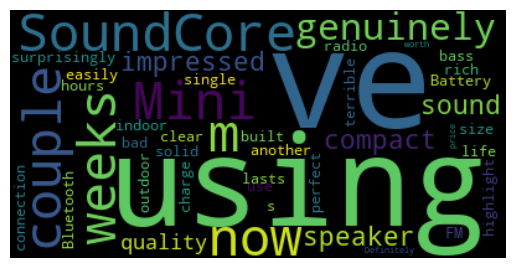

In [34]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=["I’ve been using the SoundCore Mini for a couple of weeks now, and I’m genuinely impressed.", "For such a compact speaker, the sound quality is surprisingly rich and clear, with solid bass for its size."," Battery life is another highlight—it easily lasts over 12 hours on a single charge."," Bluetooth connection is not bad , and the built-in FM radio is not terrible."," It’s perfect for both indoor and outdoor use. Definitely worth the price!"]
positive_reviews = []
for i,review in enumerate(text):
  blob = TextBlob(review)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity
  print(f"Review: {review}")
  print(f"Polarity: {polarity}")
  print(f"Subjectivity: {subjectivity}")
  if polarity > 0.1:
      sentiment = "Positive"
      positive_reviews.append(review)
  elif polarity < -0.1:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"
  print(f"Sentiment: {sentiment}")
all_positive_text=" ".join(positive_reviews)
wc=WordCloud().generate(all_positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()